#Imports

In [ ]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np
import requests
from collections import defaultdict

#Enlace al dataset
path= "https://drive.google.com/file/d/1pI3R0NIbin3k3I0IYRq4NGZnoOJxqPFM/view?usp=drivesdk"

#Obtencion del Dataset

In [ ]:
id="1pI3R0NIbin3k3I0IYRq4NGZnoOJxqPFM"
data = requests.get('https://drive.google.com/uc?export=download&confirm=9_s_&id=' + id)
data=data.text
data=data.split("\n")
data=data[0:-1]

#Conversión del Dataset

In [ ]:
def datasetEstandar():
  num_paciente=0
  dataset=[{}]*100
  
  for linea in data:
      
      linea = linea.replace(":", " ")
      linea=linea.split()
      
      pos_actual=0
      instant_actual=-1
      letter = ""
      
      paciente = defaultdict(list)
      for x in linea:
        
        if x.isalpha():
          letter=x
        if x.isnumeric():  
          if x!=instant_actual:
            instant_actual=x
            pos_actual+=1
          paciente[letter].append(pos_actual)

      dataset[num_paciente]=paciente
      num_paciente+=1
      
  return dataset

#Evaluacion de la solucion

In [ ]:
def evaluarSolucion(solucion, dataset):

  frec=0
  num_paciente=-1
  for paciente in dataset:
    pos_solucion=0
    tramo=0
    num_paciente+=1
    old_value=""
    while pos_solucion<len(solucion):
      
      if solucion[pos_solucion] in paciente:
        
        for x in paciente[solucion[pos_solucion]]:
          if old_value==solucion[pos_solucion]:
            if x > tramo:
              tramo=x
              old_value=solucion[pos_solucion]
              pos_solucion+=1
              break
          else:
            if x >= tramo:
              tramo=x
              old_value=solucion[pos_solucion]
              pos_solucion+=1
              break
        else:
          break #Loop Ended Normally ("Not Valid Solution Found"). This break finish while loop
        #Loop Endend with Break ("Value Found"). Check Next Position
        
      else: #Not letter in paciente (Not valid solution)
        break
    #print("Pos_sol Final:",pos_solucion,"Len Sol: ",len(solucion))
    if pos_solucion==len(solucion):
      #print("El paciente ",num_paciente, " cumple el patron")
      frec+=1    
  return frec

def entropy(sol):
  s=set(sol)
  
  return len(s)

#Solucion Inicial

In [ ]:
def solucion_valida(longitud,dataset):

  poblacion = []

  paciente = random.randint(0,99)
  
  solucion=""
  linea=""   
  for i, line in enumerate(data):
    if i == paciente:
      linea=line
    elif i > paciente:
      break
  caracteres=":1234567890"
  for caracter in caracteres:
    linea = linea.replace(caracter, " ")
  linea=linea.split()

  sol=set()
  while(len(sol)<longitud):
    sol.add(random.randint(0,len(linea)-1))
  sol=list(sol)

  sol.sort()
  
  for x in sol:    
    solucion+=linea[x]

     
  return (solucion,evaluarSolucion(solucion,dataset),entropy(solucion))
    

def solucion_inicial(longitud, dataset, maxPoblacion):
  poblacion=[]
  for x in range(10):
    poblacion.append(solucion_valida(longitud,dataset))
 
  while len(poblacion)<maxPoblacion:
    sol=generador(21,longitud)
    poblacion.append((sol,evaluarSolucion(sol,dataset),entropy(sol)))

  return poblacion

def generador(longitud_solucion,size):
    
    result=""
    letters="ABCDEFGHIJKLMNOPQRSTU"
    for i in range(size):

      result+=letters[random.randint(0, longitud_solucion-1)]
        
    return result

#Aplicación de Operadores Genéticos

In [ ]:
def aplicarOperadoresGeneticos(poblacion, k, cProb, mProb):

    pob=len(poblacion)-10
    npob=set()
    while len(npob)!=pob:
        s = [0,0]

        #Seleccionar padres mediante torneo tamaño k
        s[0] = torneo(poblacion,k); 
        s[1] = torneo(poblacion,k);
       
        #Cruzar padres con probabilidad cProb
        if random.randint(1,100) <= cProb*100:
            s[0], s[1] = cruce(s[0],s[1])

        #Mutar padres con probabilidad mProb
        for i in range(0,2):
          if random.randint(1,100) <= mProb*100:

            s[i] = mutar(s[i])
    
        #añadir los hijos a la nnueva poblacion
        for i in range(0,2):
            if len(npob)!= pob:
                eval=evaluarSolucion(s[i],dataset)
                conjunto=(s[i],eval,entropy(s[i]))
                if conjunto not in poblacion :
                  npob.add(conjunto)
        #print("----------------------------------")

    return npob #Devolver la nueva poblacion (sin evaluar)

#Cruce y mutación

In [ ]:
def cruce(p1,p2):
  #cruce one-cut

    rn = random.randint(1,len(p1)-1)
    
    p1, p2 = p1[:rn]+p2[rn:], p2[:rn]+p1[rn:]

    return p1, p2

def mutar(m1):
        
    rn = random.randint(0,len(m1)-1)
    letters="ABCDEFGHIJKLMNOPQRSTU"

    m1 = list(m1)
    m1[rn]=letters[random.randint(0,len(letters)-1)]
    m1 = "".join(m1)

    return m1

#Torneo

In [ ]:
def torneo(poblacion,k):

    index_candidatos = []
    candidatos = []
    
    for i in range(k):

        index = random.randint(0,len(poblacion)-1)

        candidatos.append(poblacion[index][1])
        index_candidatos.append(index)

    mejor = max(candidatos)
    pos = candidatos.index(mejor)

    return poblacion[index_candidatos[pos]][0]

Funcion para calcular la media del numero de eventos distintos y la media de las frecuencias

In [ ]:
def mediaElementos(poblacion):
  mediaEntropy = 0
  mediaFrequency = 0
  
  for individuo in poblacion:
    mediaEntropy += individuo[2]
    mediaFrequency += individuo[1]

  return mediaEntropy / 10, mediaFrequency/10

#Main

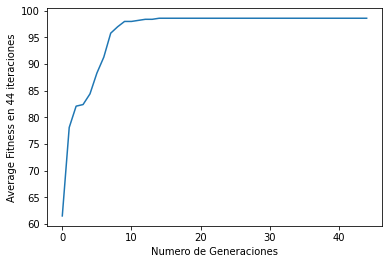

It : 0
Iteraciones Usadas:  44
10 Mejores Secuencias:  [('CCCCCCL', 99, 2), ('CFCCCCC', 99, 2), ('CCCCCFC', 99, 2), ('ACCCCCC', 99, 2), ('FCCCCCC', 99, 2), ('CCCCCCC', 99, 1), ('FCCCCCL', 98, 3), ('ACCCCFC', 98, 3), ('ACCCCCF', 98, 3), ('ACCCCCL', 98, 3)]
Frecuencia Maxima :  99
Frecuencia Media :  98.6
Frecuencia Minima :  98
Numero de Eventos Distintos:  2.3
Tiempo Empleado:  2.171379327774048

--------------------------------------------------------------------

Frecuencia Media en  1  iteraciones:  98.6
Tiempo Medio en  1  iteraciones:  2.171379327774048


In [ ]:
dataset=datasetEstandar()

def proceso(longitudSecuencia):

  tini=time.time() #iniciar temporizador
  it=0
  maxGeneraciones=150
  maxSoluciones=50
  k=5
  cProb=0.5
  mProb=0.5

  poblacion = solucion_inicial(longitudSecuencia,dataset,maxSoluciones)
  poblacion.sort(key=lambda x: [x[1],x[2]],reverse=True)

  fitness_per_it=[]
  while it < maxGeneraciones:
    #Obtenemos los descendientes
    npob = aplicarOperadoresGeneticos(poblacion,k,cProb,mProb)
    npob = list(npob)
    #Cogemos los 10 mejores de la población actual 
    poblacion=poblacion[0:10]
    #Juntamos los descendientes con los 10 mejores de la actual
    poblacion=npob+poblacion
    #Cogemos los maxSoluciones mejores de la mezcla de ambos
    poblacion.sort(key=lambda x: [x[1],x[2]],reverse=True)
    
    #Calculamos el fitness de los diez mejores individuos de la poblacion
    averagefitness=0
    for x in poblacion[0:10]:
      averagefitness+=x[1]
    fitness_per_it.append(averagefitness/10)
    #Si lleva 30 iteraciones sin mejorar se detiene
    if len(fitness_per_it)>30 and fitness_per_it[it]==fitness_per_it[it-30]:
      break

    it+=1

  tfi=time.time()
  tiempo=tfi-tini

  poblacion.sort(key=lambda x: [x[1],x[2]],reverse=True)
  poblacion=poblacion[0:10]

  fig, ax = plt.subplots()
  ax.plot(range(len(fitness_per_it)),fitness_per_it )  
  ejey= "Average Fitness en " + str(it) + ' iteraciones'
  ax.set_ylabel(ejey)
  ax.set_xlabel("Numero de Generaciones")
  plt.show()

  return poblacion, tiempo, it

def main():
  
  totalfrequencies=0
  totaltiempo = 0
  
  #VARIABLES A CAMBIAR

  its=1
  longitudSecuencia=7

  for i in range(its):
    poblacion, tiempo, it = proceso(longitudSecuencia)
    entropy, frequencies = mediaElementos(poblacion)
    print("It :",i)
    print("Iteraciones Usadas: ", it)
    print("10 Mejores Secuencias: ", poblacion)
    print("Frecuencia Maxima : ",poblacion[0][1])
    print("Frecuencia Media : ", frequencies)
    print("Frecuencia Minima : ",poblacion[9][1])
    print("Numero de Eventos Distintos: ",entropy)
    print("Tiempo Empleado: ",tiempo)
    print("")
    print("--------------------------------------------------------------------")
    print("")
    totalfrequencies+=frequencies
    totaltiempo+=tiempo
  print("Frecuencia Media en ",its, " iteraciones: ", totalfrequencies/its)
  print("Tiempo Medio en ",its, " iteraciones: ", totaltiempo/its)
    

if __name__ == "__main__":
    main()

#Resultados

###Datos con secuencia de 7
> 10 Mejores Secuencias:  [('CCCCCFC', 99, 2), ('FCCCCCC', 99, 2), ('CCCCCCL', 99, 2), ('ACCCCCC', 99, 2), ('CFCCCCC', 99, 2), ('CCCCCCC', 99, 1), ('ACCCCCL', 98, 3), ('CCCCCFL', 98, 3), ('CFCCCCL', 98, 3), ('ACCCCCF', 98, 3)] \\
Frecuencia Maxima :  99 \\
Frecuencia Media :  98.6 \\
Frecuencia Minima :  98 \\
Tiempo Empleado:  2.37 \\
Media de eventos:  2.3 \\

###Datos con secuencia de 10

> 10 Mejores Secuencias:  [('FCCCCCCCCC', 99, 2), ('CFCCCCCCCC', 99, 2), ('CCCCCCCCCC', 99, 1), ('ACFCCCCCCC', 98, 3), ('AFCCCCCCCC', 98, 3), ('FCCCCCCCCL', 98, 3), ('CFCCCCCCCL', 98, 3), ('CCCCCCCCCL', 98, 2), ('CCCCCFCCCC', 98, 2), ('ACCCCCCCCC', 98, 2)] \\
Frecuencia Maxima :  99 \\
Frecuencia Media :  98.3 \\
Frecuencia Minima :  98 \\
Tiempo Empleado:  5.22 \\
Media de eventos:  2.3 \\



###Datos con secuencia de 15

> 10 Mejores Secuencias:  [('CCCCFCCCCCCCCCC', 98, 2), ('CCCFCCCCCCCCCCC', 98, 2), ('CCCCCCFCCCCCCCC', 98, 2), ('CCFCCCCCCCCCCCC', 98, 2), ('CCCCCCCFCCCCCCC', 98, 2), ('CCCCCCCCCCCCCCC', 98, 1), ('CCCFCCCCCCCCCCL', 97, 3), ('ACCCCCFCCCCCCCC', 97, 3), ('CCCCFCCCCCCCCCL', 97, 3), ('ACCCCCCCFCCCCCC', 97, 3)] \\
Frecuencia Maxima :  98 \\
Frecuencia Media :  97.6 \\
Frecuencia Minima :  97 \\
Tiempo Empleado:  13.79124412536621 \\
Media de eventos:  2.3 \\




#Codigo No Utilizado

In [ ]:
 #Version con multiprocesos, en colab es incluso mas lento porque solo tiene un core

from multiprocessing import Pool
from multiprocessing import Manager
from multiprocessing import Process

def solucion_aleatoria_valida(process,longitud,dataset,return_dict,run):
  min_frecuencia=1
  
  while run.is_set():
      sol=generador(21,longitud)

      frecuencia=evaluarSolucion(sol,dataset)
      if frecuencia>=min_frecuencia:
        return_dict[process] = [sol,frecuencia]
        run.clear()
      

def solucion_inicial(longitud, dataset, maxPoblacion):


  
  processes = []
  manager = Manager()
  return_code = manager.dict()
  run = manager.Event()
  run.set()  # We should keep running.
  for i in range(4):
    process = Process(
      target=solucion_aleatoria_valida, args=(f"computer_{i}", longitud, dataset, return_code, run)
    )
    processes.append(process)
    process.start()

  for process in processes:
    process.join()

  poblacion = return_code.values()


    objective=poblacion[9][1]
    cont=0
    start=[False,0]
    end=0
    for x in poblacion:
      if x[1]==objective and start[0]==False:
        start=[True,cont]
      elif x[1]!=objective and start[0]:
        end=cont
        break;
      cont+=1

    aux=sorted(poblacion[start[1]:end],key=entropy,reverse=True)

    poblacion[start[1]:end]=aux
